In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

In [28]:
target_60 = pd.read_csv('target_day.csv')

In [29]:
#异常值处理(滑动60天)
qt_60 = stats.scoreatpercentile(target_60["slope_ratio"],[1,99])#存储两个极端值，用于截断
target_60['LAI'] = target_60['slope_ratio'][(target_60['slope_ratio']>qt_60[0])&(target_60['slope_ratio']<qt_60[1])]
target_60['LAI'] = pd.DataFrame(target_60['LAI'])
target_60['LAI'].to_csv('target_60_qt.csv')

In [30]:
#保存成新文件
target_qt_60 = pd.read_csv('target_60_qt.csv')
target_qt_60.head()

,Unnamed: 0,LAI
0,0,-1.840243
1,1,-2.962380
2,2,-2.633004
3,3,-4.355890
4,4,-5.787868


In [31]:
#自定义分组(滑动60天)
bins = [-35,-5,-4,-3,-2,-1,0,1,2,3,4,5,35]
target_qt_60['bins'] = pd.cut(target_qt_60['LAI'], bins)
df_bins = target_qt_60['bins'].value_counts().to_frame()
df_bins.index.names = ['bins']
df_bins.sort_index(ascending=True, inplace=True)
df_bins.to_csv('df_bins.csv')

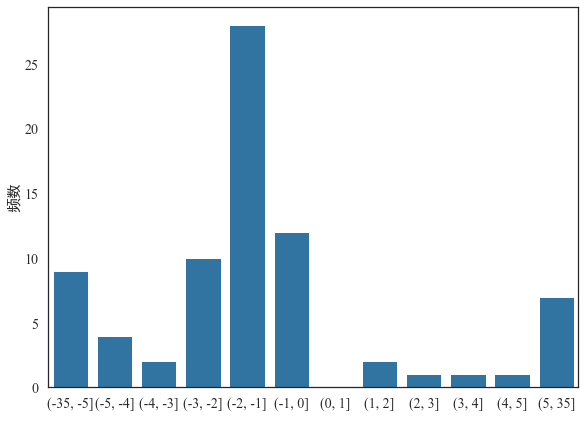

In [32]:
df_bins_60 = pd.read_csv('df_bins.csv')
df_bins_60.columns = ['bins', 'count']
fig, ax = plt.subplots(1,1,figsize=(9.5,7))
sns.set_theme(style="white")
sns.barplot(x = 'bins',y = 'count',ax=ax,data=df_bins_60,color='#1f77b4')
plt.xlabel(' ',fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('频数',fontdict={'weight': 'normal', 'size': 15})
plt.yticks(fontproperties = 'Times New Roman',size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)


plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
#plt.savefig('dynamic_60.png',dpi = 300)
plt.show()